# Post-processing

In this tutorial we demonstrate the functionality and posterior operations supported by the [PostProcessing](postprocessing.rst) module by operating with the example posterior samples found in ``examples/examples_fast/Outputs``. A previous version of this Post-processing tutorial operating with the posterior samples reported by [Riley et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019ApJ...887L..21R/abstract) is given [here](https://github.com/xpsi-group/xpsi/blob/cff82f299da93ca97c84ffb34390ab077cc001b3/docs/source/postprocessing_tutorial.ipynb) with more post-processing examples (however, using model files which are not supported anymore).

In [1]:
# Importing relevant modules

%matplotlib inline

from __future__ import division

import sys
import os
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import MultipleLocator, AutoLocator, AutoMinorLocator
from matplotlib import gridspec
from matplotlib import cm
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import math

from collections import OrderedDict

import xpsi

from xpsi import PostProcessing

# choose a seed for the notebook if you want caching to be useful
# and the notebook exactly reproducible
PostProcessing.set_random_seed(42)

from xpsi.global_imports import gravradius

/=============================================\
| X-PSI: X-ray Pulse Simulation and Inference |
|---------------------------------------------|
|                Version: 2.2.1               |
|---------------------------------------------|
|      https://xpsi-group.github.io/xpsi      |
\=============================================/

Imported GetDist version: 1.4.7
Imported nestcheck version: 0.2.1


Setting path to import additional module

In [2]:
path="../../examples/examples_fast/Modules/" 
sys.path.append(path)

Importing main

In [3]:
import main as ST

Loading the data assuming the notebook was run for documentation pages
Setting channels for event data...
Channels set.
Setting channels for loaded instrument response (sub)matrix...
Channels set.
No parameters supplied... empty subspace created.
Creating parameter:
    > Named "phase_shift" with fixed value 0.000e+00.
    > The phase shift for the signal, a periodic parameter [cycles].
Creating parameter:
    > Named "frequency" with fixed value 3.140e+02.
    > Spin frequency [Hz].
Creating parameter:
    > Named "mass" with bounds [1.000e+00, 1.600e+00].
    > Gravitational mass [solar masses].
Creating parameter:
    > Named "radius" with bounds [1.000e+01, 1.300e+01].
    > Coordinate equatorial radius [km].
Creating parameter:
    > Named "distance" with bounds [5.000e-01, 2.000e+00].
    > Earth distance [kpc].
Creating parameter:
    > Named "cos_inclination" with bounds [0.000e+00, 1.000e+00].
    > Cosine of Earth inclination to rotation axis.
Creating parameter:
    > Named 

Let's see the free parameters fo the our model

In [4]:
ST.likelihood

Free parameters
---------------
mass: Gravitational mass [solar masses].
radius: Coordinate equatorial radius [km].
distance: Earth distance [kpc].
cos_inclination: Cosine of Earth inclination to rotation axis.
hot__phase_shift: The phase of the hot region, a periodic parameter [cycles].
hot__super_colatitude: The colatitude of the centre of the superseding region [radians].
hot__super_radius: The angular radius of the (circular) superseding region [radians].
hot__super_temperature: log10(superseding region effective temperature [K]).

Now let's set the names, the bounds and the labels of the free parameters for later use

In [5]:
# Settings names, bounds and labels

ST.names=['mass','radius','distance','cos_inclination','hot__phase_shift',
          'hot__super_colatitude','hot__super_radius','hot__super_temperature']

# We will use the same bounds used during sampling
ST.bounds = {'mass':(1.0,1.6),
             'radius':(10,13),
             'distance':(0.5,2.0),
             'cos_inclination':(0,1),
             'hot__phase_shift':(-0.25, 0.75),
             'hot__super_colatitude':(0.001, math.pi/2 - 0.001),
             'hot__super_radius':(0.001, math.pi/2.0 - 0.001),
             'hot__super_temperature':(6., 7.)}

# Now the labels
ST.labels = {'mass': r"M\;\mathrm{[M}_{\odot}\mathrm{]}",
              'radius': r"R_{\mathrm{eq}}\;\mathrm{[km]}",
              'distance': r"D \;\mathrm{[kpc]}",
              'cos_inclination': r"\cos(i)",
              'hot__phase_shift': r"\phi_{p}\;\mathrm{[cycles]}",
              'hot__super_colatitude': r"\Theta_{spot}\;\mathrm{[rad]}",
              'hot__super_radius': r"\zeta_{spot}\;\mathrm{[rad]}",
              'hot__super_temperature': r"\mathrm{log10}(T_{spot}\;[\mathrm{K}])"}

Let's also add the compactness because we also added that extra parameter to be derived

In [6]:
ST.names +=['compactness']
ST.bounds['compactness']=(gravradius(1.0)/16.0, 1.0/3.0)
ST.labels['compactness']= r"M/R_{\mathrm{eq}}"

Getdist settings, usually no need to be changed

In [7]:
 getdist_kde_settings = {'ignore_rows': 0,
                         'min_weight_ratio': 1.0e-10,
                         'contours': [0.683, 0.954, 0.997],
                         'credible_interval_threshold': 0.001,
                         'range_ND_contour': 0,
                         'range_confidence': 0.001,
                         'fine_bins': 1024,
                         'smooth_scale_1D': 0.4,
                         'num_bins': 100,
                         'boundary_correction_order': 1,
                         'mult_bias_correction_order': 1,
                         'smooth_scale_2D': 0.4,
                         'max_corr_2D': 0.99,
                         'fine_bins_2D': 512,
                         'num_bins_2D': 40}



Let's now load the run

In [8]:
ST.runs = xpsi.Runs.load_runs(ID='ST',
                               run_IDs=['run'],
                               roots=['ST_live_1000_eff_0.3_seed0'],
                               base_dirs=['../../examples/examples_fast/Outputs/'],
                               use_nestcheck=[False],
                               kde_settings=getdist_kde_settings,
                               likelihood=ST.likelihood,
                               names=ST.names,
                               bounds=ST.bounds,
                               labels=ST.labels,
                               implementation='multinest',
                               overwrite_transformed=True)

## Corner plots

Looking now at all the inferred parameters

Executing posterior density estimation...
Curating set of runs for posterior plotting...
Run set curated.
Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['mass', 'radius']
plotting:  ['mass', 'distance']
plotting:  ['mass', 'cos_inclination']
plotting:  ['mass', 'hot__phase_shift']
plotting:  ['mass', 'hot__super_colatitude']
plotting:  ['mass', 'hot__super_radius']
plotting:  ['mass', 'hot__super_temperature']
plotting:  ['mass', 'compactness']
plotting:  ['radius', 'distance']
plotting:  ['radius', 'cos_inclination']
plotting:  ['radius', 'hot__phase_shift']
plotting:  ['radius', 'hot__super_colatitude']
plotting:  ['radius', 'hot__super_radius']
plotting:  ['radius', 'hot__super_temperature']
plotting:  ['radius', 'compactness']
plotting:  ['distance', 'cos_inclination']
plotting:  ['distance', 'hot__phase_shift']
plotting:  ['distance', 'hot__super_colatitude']
plotting:  ['distance', 'hot__super_radius']
plotting:  ['distance', 'hot__super_temperat

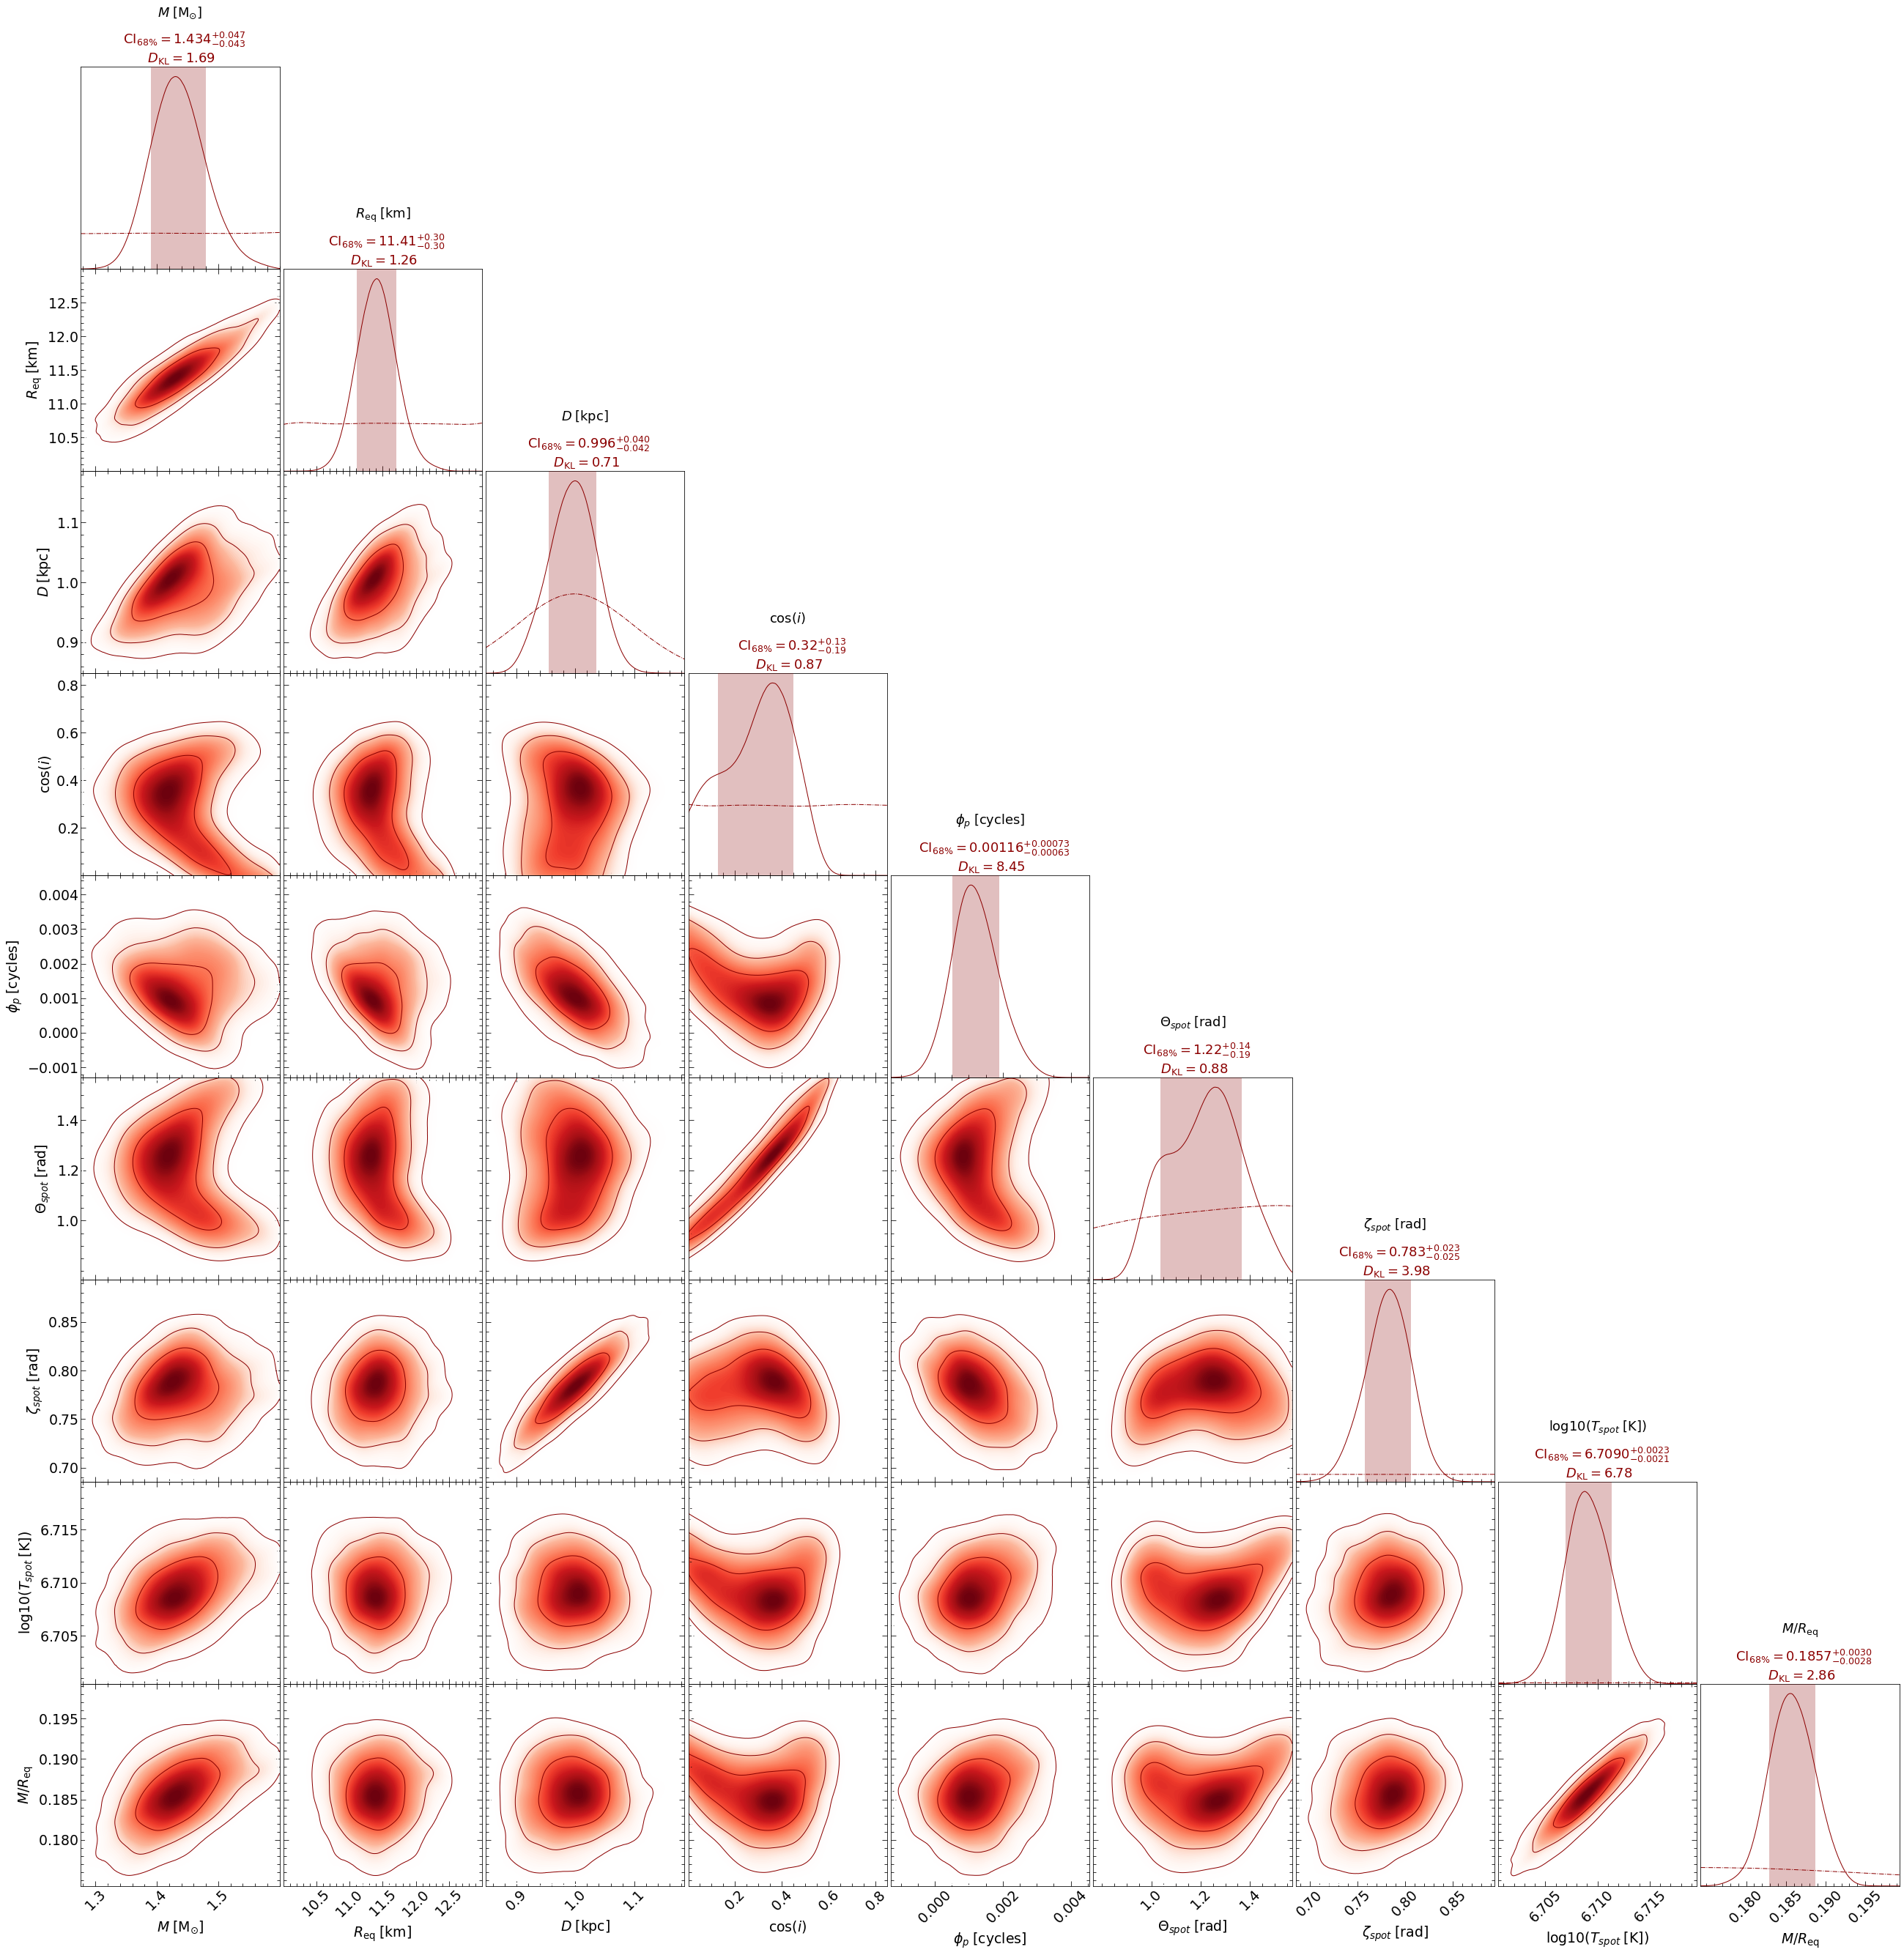

In [9]:
pp = xpsi.PostProcessing.CornerPlotter([ST.runs])
_ = pp.plot(
     params=ST.names,
    
     IDs=OrderedDict([('ST', ['run',]),]),
     prior_density=True,
     KL_divergence=True,
     ndraws=5e4,
     combine=False, combine_all=True, only_combined=False, overwrite_combined=True,
     param_plot_lims={},
     bootstrap_estimators=False,
     bootstrap_density=False,
     n_simulate=200,
     crosshairs=False,
     write=False,
     ext='.png',
     maxdots=3000,
     root_filename='run',
     credible_interval_1d=True,
     annotate_credible_interval=True,
     compute_all_intervals=False,
     sixtyeight=True,
     axis_tick_x_rotation=45.0,
     num_plot_contours=3,
     subplot_size=4.0,
     legend_corner_coords=(0.675,0.8),
     legend_frameon=False,
     scale_attrs=OrderedDict([('legend_fontsize', 2.0),
                              ('axes_labelsize', 1.35),
                              ('axes_fontsize', 'axes_labelsize'),
                             ]
                            ),
     colormap='Reds',
     shaded=True,
     shade_root_index=-1,
     rasterized_shade=True,
     no_ylabel=True,
     no_ytick=True,
     lw=1.0,
     lw_1d=1.0,
     filled=False,
     normalize=True,
     veneer=True,
     #contour_colors=['orange'],
     tqdm_kwargs={'disable': False},
     lengthen=2.0,
     embolden=1.0,
     nx=500)


Now let's plot a subset of those parameters, say : Mass, Radius and Compactness

Executing posterior density estimation...
Curating set of runs for posterior plotting...
Run set curated.
Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['mass', 'radius']
plotting:  ['mass', 'compactness']
plotting:  ['radius', 'compactness']
Adding 1D marginal prior density functions...
Plotting prior for posterior ST...
Drawing samples from the joint prior...
Samples drawn.
Estimating 1D marginal KL-divergences in bits...
mass KL-divergence = 1.6920...
radius KL-divergence = 1.2603...
compactness KL-divergence = 2.8594...
Estimated 1D marginal KL-divergences.
Added 1D marginal prior density functions.
Veneering spines and axis ticks...
Veneered.
Adding 1D marginal credible intervals...
Plotting credible regions for posterior ST...
Added 1D marginal credible intervals.
Constructed lower-triangle posterior density plot.
Posterior density estimation complete.


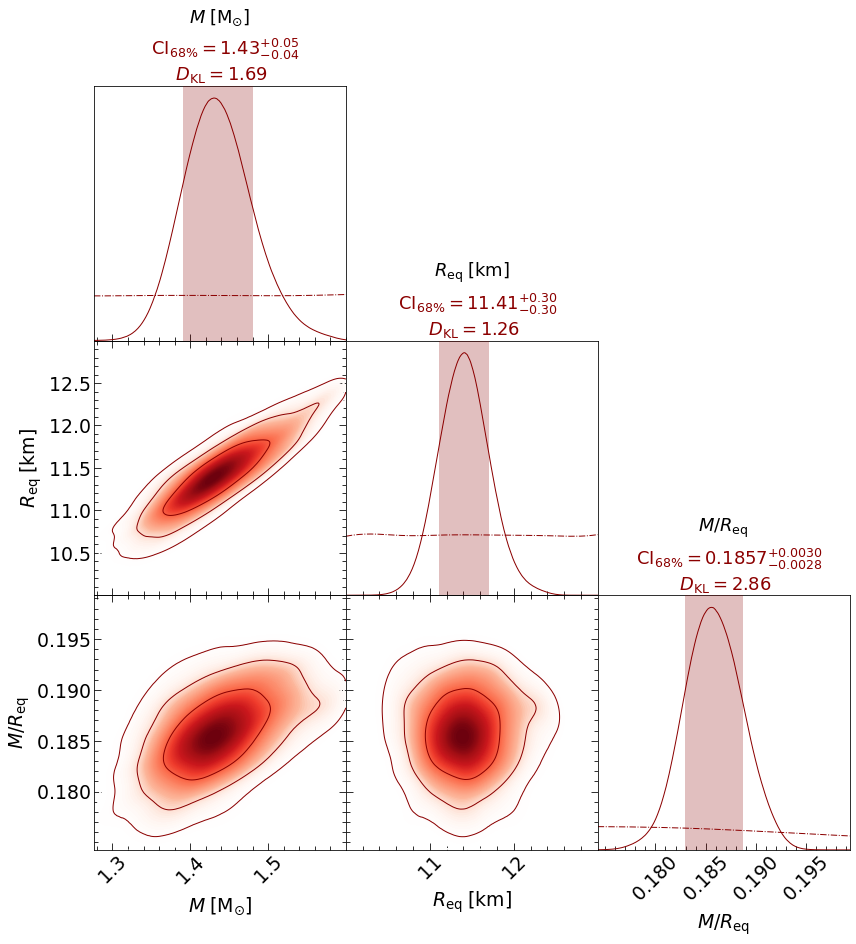

In [10]:
_ = pp.plot(
     params=["mass", "radius", "compactness"],
    
     IDs=OrderedDict([('ST', ['run',]),]),
     prior_density=True,
     KL_divergence=True,
     ndraws=5e4,
     combine=False, combine_all=True, only_combined=False, overwrite_combined=True,
     param_plot_lims={},
     bootstrap_estimators=False,
     bootstrap_density=False,
     n_simulate=200,
     crosshairs=False,
     write=False,
     ext='.png',
     maxdots=3000,
     root_filename='run',
     credible_interval_1d=True,
     annotate_credible_interval=True,
     compute_all_intervals=False,
     sixtyeight=True,
     axis_tick_x_rotation=45.0,
     num_plot_contours=3,
     subplot_size=4.0,
     legend_corner_coords=(0.675,0.8),
     legend_frameon=False,
     scale_attrs=OrderedDict([('legend_fontsize', 2.0),
                              ('axes_labelsize', 1.35),
                              ('axes_fontsize', 'axes_labelsize'),
                             ]
                            ),
      colormap='Reds',
     shaded=True,
     shade_root_index=-1,
     rasterized_shade=True,
     no_ylabel=True,
     no_ytick=True,
     lw=1.0,
     lw_1d=1.0,
     filled=False,
     normalize=True,
     veneer=True,
     #contour_colors=['orange'],
     tqdm_kwargs={'disable': False},
     lengthen=2.0,
     embolden=1.0,
     #Adjusting the decimal precision for the reported mass interval (and automatic precision for the others):
     precisions=[2,None,None],
     nx=500)


For the sake of example, let's assume one has multiple runs for the same model and wants to plots them all on a same plot.

Here, we have two runs, one performed fixing multinest seed to 0, and the second fixing the  seed to 42.

In [11]:
# Loading the runs

ST.runs = xpsi.Runs.load_runs(ID='ST',
                               run_IDs=['run_seed0','run_seed42'],
                               roots=['ST_live_1000_eff_0.3_seed0','ST_live_1000_eff_0.3_seed42'],
                               base_dirs=['../../examples/examples_fast/Outputs/',
                                         '../../examples/examples_fast/Outputs/'],
                               use_nestcheck=[True]*2,#[True]*2,
                               kde_settings=getdist_kde_settings,
                               likelihood=ST.likelihood,
                               names=ST.names,
                               bounds=ST.bounds,
                               labels=ST.labels,
                               implementation='multinest',
                               overwrite_transformed=True)

Executing posterior density estimation...
Curating set of runs for posterior plotting...
Run set curated.
Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['mass', 'radius']
plotting:  ['mass', 'distance']
plotting:  ['mass', 'cos_inclination']
plotting:  ['mass', 'hot__phase_shift']
plotting:  ['mass', 'hot__super_colatitude']
plotting:  ['mass', 'hot__super_radius']
plotting:  ['mass', 'hot__super_temperature']
plotting:  ['mass', 'compactness']
plotting:  ['radius', 'distance']
plotting:  ['radius', 'cos_inclination']
plotting:  ['radius', 'hot__phase_shift']
plotting:  ['radius', 'hot__super_colatitude']
plotting:  ['radius', 'hot__super_radius']
plotting:  ['radius', 'hot__super_temperature']
plotting:  ['radius', 'compactness']
plotting:  ['distance', 'cos_inclination']
plotting:  ['distance', 'hot__phase_shift']
plotting:  ['distance', 'hot__super_colatitude']
plotting:  ['distance', 'hot__super_radius']
plotting:  ['distance', 'hot__super_temperat

/tmp/ipykernel_15579/137855446.py:52: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in _.legend.legendHandles:


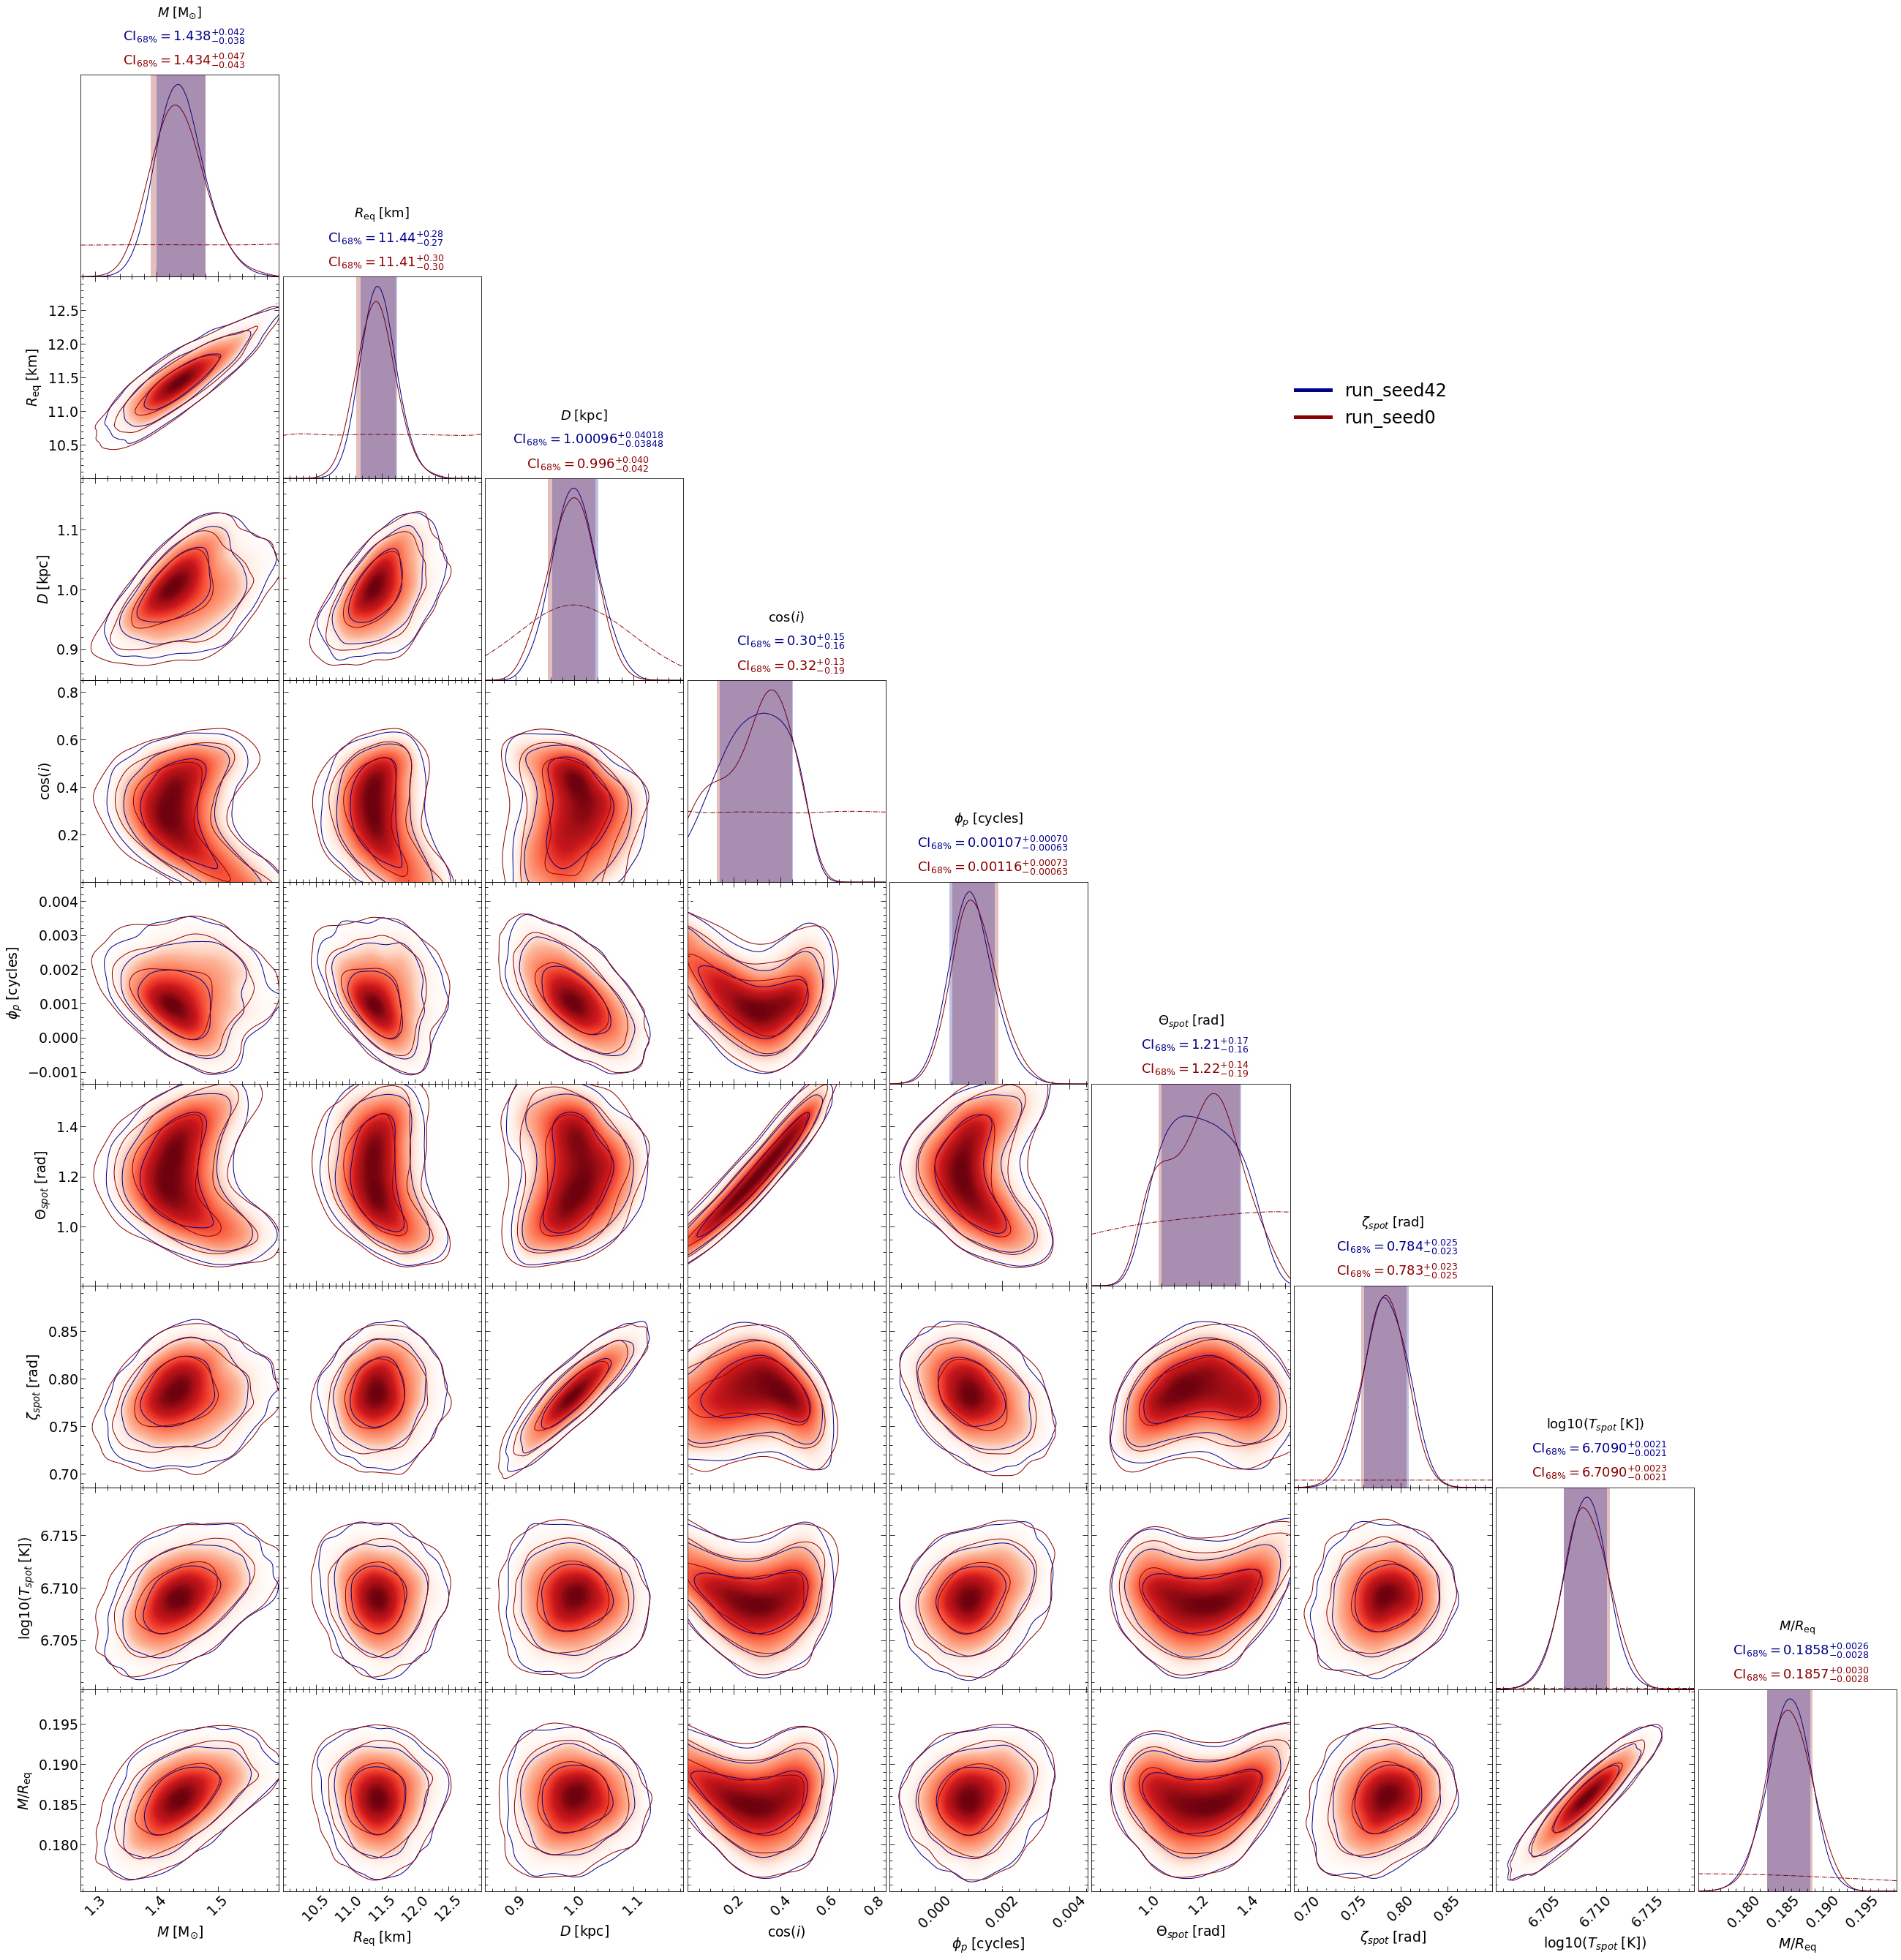

In [12]:
pp = xpsi.PostProcessing.CornerPlotter([ST.runs])
_ = pp.plot(
     params=ST.names,
     IDs=OrderedDict([('ST', ['run_seed0','run_seed42',]),]),
     prior_density=True,
     KL_divergence=True,
     ndraws=5e4,
     combine=False, combine_all=True, only_combined=False, overwrite_combined=True,
     param_plot_lims={},
     bootstrap_estimators=False,
     bootstrap_density=False,
     n_simulate=200,
     crosshairs=False,
     write=False,
     ext='.png',
     maxdots=3000,
     root_filename='run',
     credible_interval_1d=True,
     credible_interval_1d_all_show=True, # To show credible intervals for all runs/models
     show_vband=[0,1],                   # To list which vertical colored bands are shown in 1D-posteriors
                                         #  0 for run_seed0,  1 for run_seed42
     annotate_credible_interval=True,
     compute_all_intervals=False,
     sixtyeight=True,
     axis_tick_x_rotation=45.0,
     num_plot_contours=3,
     subplot_size=4.0,
     legend_corner_coords=(0.675,0.8),
     legend_frameon=False,
     scale_attrs=OrderedDict([('legend_fontsize', 2.0),
                              ('axes_labelsize', 1.35),
                              ('axes_fontsize', 'axes_labelsize'),
                             ]
                            ),
     colormap='Reds',
     shaded=True,
     shade_root_index=-1,
     rasterized_shade=True,
     no_ylabel=True,
     no_ytick=True,
     lw=1.0,
     lw_1d=1.0,
     filled=False,
     normalize=True,
     veneer=True,
     tqdm_kwargs={'disable': False},
     lengthen=2.0,
     embolden=1.0,
     nx=500)

# If you have multiple runs/models, you can increase the legend linewidth
for legobj in _.legend.legendHandles:
        legobj.set_linewidth(5.0)

We can also obtain the credible intervals shown on the plot in the form of a list:

In [13]:
credible_intervals=pp.credible_intervals

In [14]:
# Printing the first one:
print(credible_intervals["ST_run_seed0"])

[[ 1.434e+00 -4.300e-02  4.700e-02]
 [ 1.141e+01 -3.000e-01  3.000e-01]
 [ 9.960e-01 -4.200e-02  4.000e-02]
 [ 3.200e-01 -1.900e-01  1.300e-01]
 [ 1.160e-03 -6.300e-04  7.300e-04]
 [ 1.220e+00 -1.900e-01  1.400e-01]
 [ 7.830e-01 -2.500e-02  2.300e-02]
 [ 6.709e+00 -2.100e-03  2.300e-03]
 [ 1.857e-01 -2.800e-03  3.000e-03]]


In [15]:
# Printing the second one:
print(credible_intervals["ST_run_seed42"])

[[ 1.43800e+00 -3.80000e-02  4.20000e-02]
 [ 1.14400e+01 -2.70000e-01  2.80000e-01]
 [ 1.00096e+00 -3.84800e-02  4.01800e-02]
 [ 3.00000e-01 -1.60000e-01  1.50000e-01]
 [ 1.07000e-03 -6.30000e-04  7.00000e-04]
 [ 1.21000e+00 -1.60000e-01  1.70000e-01]
 [ 7.84000e-01 -2.30000e-02  2.50000e-02]
 [ 6.70900e+00 -2.10000e-03  2.10000e-03]
 [ 1.85800e-01 -2.80000e-03  2.60000e-03]]


Assuming that one knows the values that have been used to produce the data and wants to show them:

In [16]:
# Our case: 

ST.truths={'mass': 1.4,                               # Mass in solar Mass
          'radius': 12.,                              # Equatorial radius in km
          'distance': 1.0,                            # Distance in kpc
          'cos_inclination': math.cos(60*np.pi/180),  # Cosine of Earth inclination to rotation axis
          'hot__phase_shift': 0.0,                    # Phase shift
          'hot__super_colatitude': 70*np.pi/180,      # Colatitude of the centre of the superseding region
          'hot__super_radius': 0.75,                  # Angular radius of the (circular) superseding region
          'hot__super_temperature':6.7}               # Temperature in log 

ST.truths['compactness']=gravradius(ST.truths['mass'])/ST.truths['radius']



In [17]:
# Loading the run again :)

ST.runs = xpsi.Runs.load_runs(ID='ST',
                               run_IDs=['run'],
                               roots=['ST_live_1000_eff_0.3_seed0'],
                               base_dirs=['../../examples/examples_fast/Outputs/'],
                               use_nestcheck=[True],
                               kde_settings=getdist_kde_settings,
                               likelihood=ST.likelihood,
                               names=ST.names,
                               bounds=ST.bounds,
                               labels=ST.labels,
                               truths=ST.truths, # Adding this line
                               implementation='multinest',
                               overwrite_transformed=True)

Executing posterior density estimation...
Curating set of runs for posterior plotting...
Run set curated.
Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['mass', 'radius']
plotting:  ['mass', 'distance']
plotting:  ['mass', 'cos_inclination']
plotting:  ['mass', 'hot__phase_shift']
plotting:  ['mass', 'hot__super_colatitude']
plotting:  ['mass', 'hot__super_radius']
plotting:  ['mass', 'hot__super_temperature']
plotting:  ['mass', 'compactness']
plotting:  ['radius', 'distance']
plotting:  ['radius', 'cos_inclination']
plotting:  ['radius', 'hot__phase_shift']
plotting:  ['radius', 'hot__super_colatitude']
plotting:  ['radius', 'hot__super_radius']
plotting:  ['radius', 'hot__super_temperature']
plotting:  ['radius', 'compactness']
plotting:  ['distance', 'cos_inclination']
plotting:  ['distance', 'hot__phase_shift']
plotting:  ['distance', 'hot__super_colatitude']
plotting:  ['distance', 'hot__super_radius']
plotting:  ['distance', 'hot__super_temperat

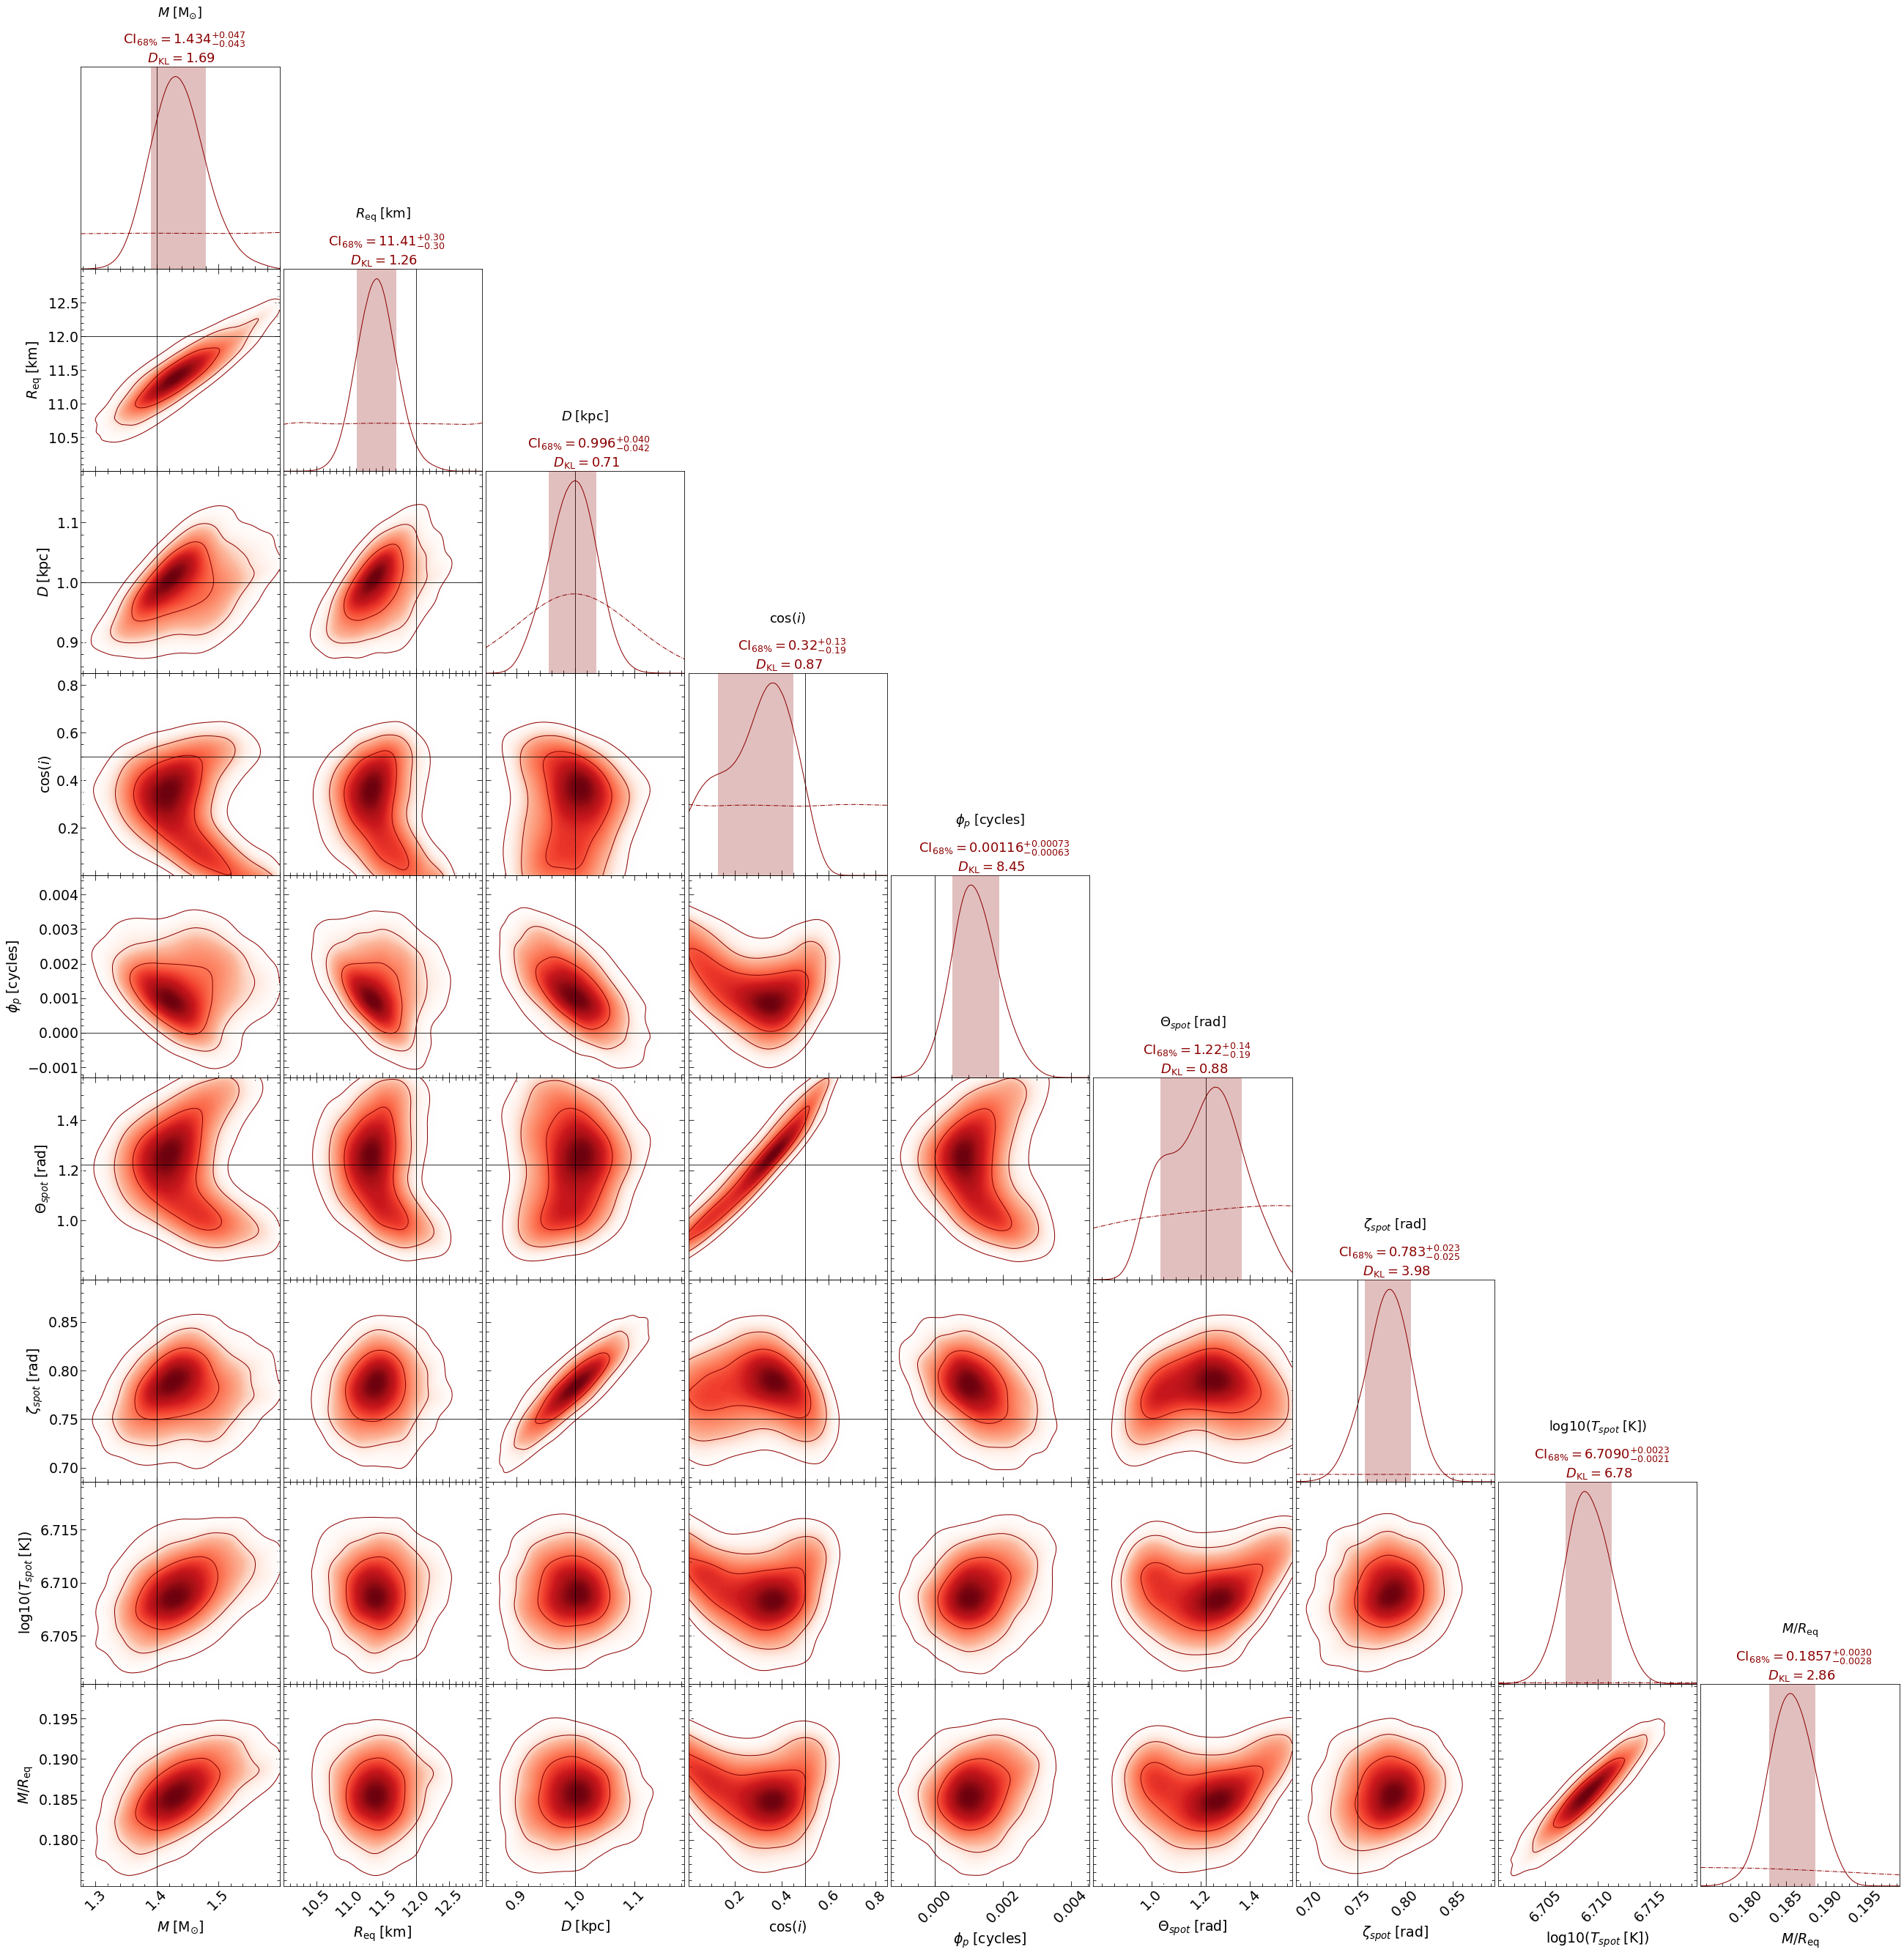

In [18]:
pp = xpsi.PostProcessing.CornerPlotter([ST.runs])
_ = pp.plot(
     params=ST.names,
    
     IDs=OrderedDict([('ST', ['run',]),]),
     prior_density=True,
     KL_divergence=True,
     ndraws=5e4,
     combine=False, combine_all=True, only_combined=False, overwrite_combined=True,
     param_plot_lims={},
     bootstrap_estimators=False,
     bootstrap_density=False,
     n_simulate=200,
     crosshairs=True, # Turn this to true
     write=False,
     ext='.png',
     maxdots=3000,
     root_filename='run',
     credible_interval_1d=True,
     credible_interval_1d_show_all=True,
     annotate_credible_interval=True,
     compute_all_intervals=False,
     sixtyeight=True,
     axis_tick_x_rotation=45.0,
     num_plot_contours=3,
     subplot_size=4.0,
     legend_corner_coords=(0.675,0.8),
     legend_frameon=False,
     scale_attrs=OrderedDict([('legend_fontsize', 2.0),
                              ('axes_labelsize', 1.35),
                              ('axes_fontsize', 'axes_labelsize'),
                             ]
                            ),
      colormap='Reds',
     shaded=True,
     shade_root_index=-1,
     rasterized_shade=True,
     no_ylabel=True,
     no_ytick=True,
     lw=1.0,
     lw_1d=1.0,
     filled=False,
     normalize=True,
     veneer=True,
     #contour_colors=['orange'],
     tqdm_kwargs={'disable': False},
     lengthen=2.0,
     embolden=1.0,
     nx=500)


## Residual plot

Now let’s plot the standardised Poissonian residuals of the first run

Declaring plot class settings...
Settings declared.
Instantiating a residual plotter for posterior checking...
Residual plotter instantiated.
Plotting signals for posterior checking...
Curating set of runs for posterior plotting...
Run set curated.
Handling posterior ST...
Checking whether an existing cache can be read:
Creating new cache file...
Attempting to archive existing cache file in a subdirectory...
Targeting subdirectory: ./archive.
Exisiting cache file archived in subdirectory ./archive.
Initialising cache file...
Cache file initialised.
Cache file created.
Cache state determined.


Signal caching loop:   0%|          | 0/100 [00:00<?, ?it/s]

ResidualPlot object iterating over samples...
ResidualPlot object finished iterating.
ResidualPlot object finalizing...
ResidualPlot object finalized.
Writing plot to disk...
ResidualPlot instance plot will be written to path ./ST.run__signalplot_residuals.pdf...
Written.
Handled posterior ST.
Plotted signals for posterior checking.


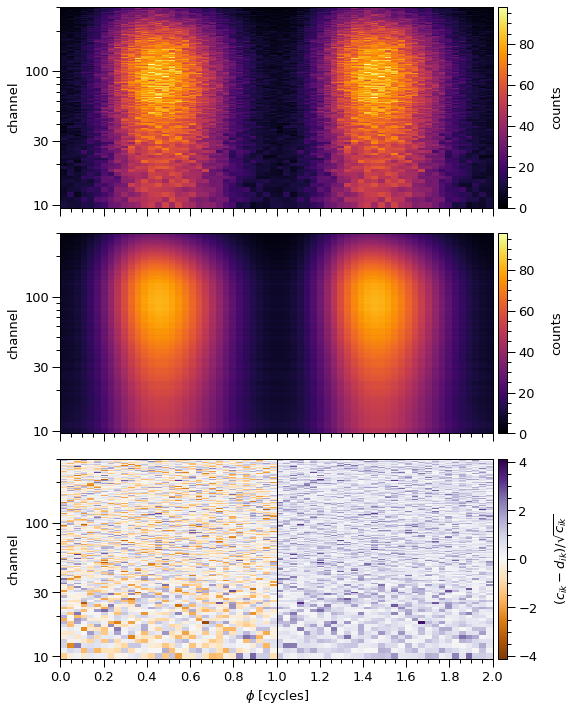

In [19]:
# Now let's plot the resudual of the first run.
pp = xpsi.SignalPlotter([ST.runs])
# Setting next the yticks for the 3 plots, alternating the main plot and the color bar y-ticks.
# (None if using automatic tikcs)
xpsi.ResidualPlot.declare_settings(yticks=[[10,30,100],None,[10,30,100],None,[10,30,100],None])
pp.plot(IDs=OrderedDict([('ST', ['run']),
                        ]),
        combine=False, # use these controls if more than one run for a posterior
        combine_all=False,
        force_combine=False,
        only_combined=False,
        force_cache=True,
        nsamples=100,
        plots = {'ST': xpsi.ResidualPlot()})

pp.plots["ST"].fig


## Signal plots

Now let’s plot pulse and spectrum plots for the inferred signals.

In [20]:
ST.likelihood.clear_cache()
p=[1.4,12,1.,math.cos(60*np.pi/180),0.0,70*np.pi/180, 0.75,6.7]
ST.likelihood.check(None, [-3.1603740790e+04], 1.0e-5, physical_points=[p])

Checking likelihood and prior evaluation before commencing sampling...
Not using ``allclose`` function from NumPy.
Using fallback implementation instead.
Checking closeness of likelihood arrays:
-3.1603740790e+04 | -3.1603740790e+04 .....
Closeness evaluated.
Log-likelihood value checks passed on root process.
Checks passed.


'Log-likelihood value checks passed on root process.'

In [21]:
pp = xpsi.SignalPlotter([ST.runs])

In [22]:
# Setting next the yticks: First to the 4 main plots and then to the 4 color bars.
xpsi.PulsePlot.declare_settings(extension='.png',yticks=[[0.2,0.5,1.0],None,[10,30,100],None,None,None,None,None])
pp.plot(
     IDs=OrderedDict([('ST', ['run',]),]),  
   nsamples=200,
   plots = {         
            'ST': xpsi.PulsePlot(use_fgivenx=True,
                                        comp_expectation_line_kwargs=dict(color='b',
                                                                           ls='-.',
                                                                           lw=0.75,
                                                                           alpha=1.0),
                                        show_components=True,
                                        fig_dir='.',
                                        write=True,
                                        root_filename= 'ST_model_signal',),       
            }
       )        


Declaring plot class settings...
Settings declared.
Instantiating a pulse-profile plotter for posterior checking...
Pulse-profile plotter instantiated.
Plotting signals for posterior checking...
Curating set of runs for posterior plotting...
Run set curated.
Handling posterior ST...
Checking whether an existing cache can be read:
Cache state determined.
PulsePlot object iterating over samples...
Adding credible intervals on the incident photon flux signal as function of phase...


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

Credible intervals added.
Added conditional posterior contours for incident signal.
Adding credible intervals on the count-rate signal as function of phase...


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

Credible intervals added.
Added conditional posterior contours for registered signal.
PulsePlot object finished iterating.
PulsePlot object finalizing...
PulsePlot object finalized.
Writing plot to disk...
PulsePlot instance plot will be written to path ./ST_model_signal__ST.run__signalplot_pulse.png...
Written.
Handled posterior ST.
Plotted signals for posterior checking.


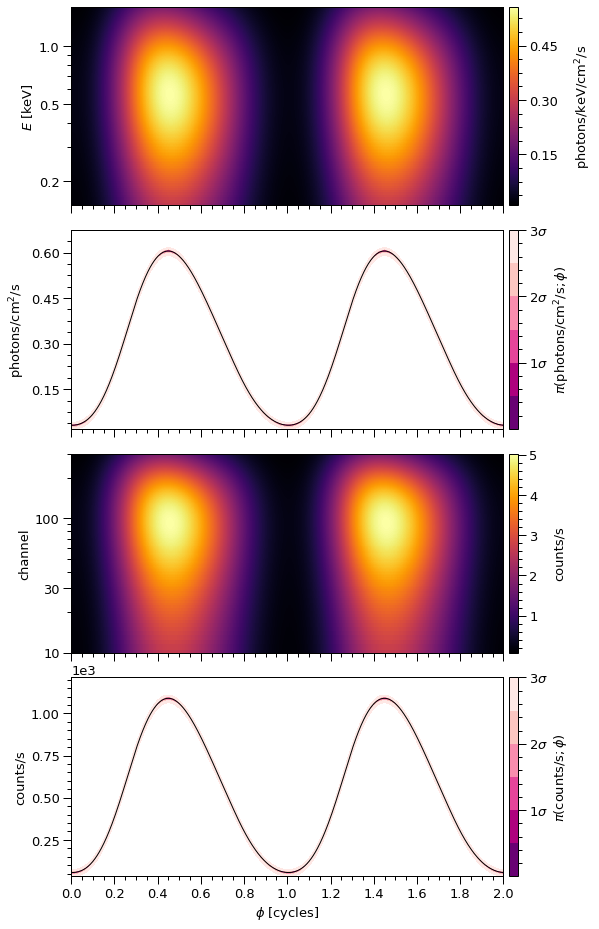

In [23]:
pp.plots['ST'].fig

In [24]:
# Setting next both the xticks and yticks: First to the 3 main plots and then to the 3 color bars.
xpsi.SpectrumPlot.declare_settings(extension='.png',xticks=[[0.2,0.5,1.0],[10,30,100],[10,30,100],\
                                                            None,None,None],\
                                   yticks=[[0.1,0.2],None,[1.0,2.0],None,None,None]
                                  )
pp.plot(
     IDs=OrderedDict([('ST', ['run',]),]),     
   nsamples=200,
   plots = {
            'ST': xpsi.SpectrumPlot(use_fgivenx=True,
                                        expectation_line_kwargs=dict(color='k',
                                                                      ls='-',
                                                                      lw=1.0,
                                                                      alpha=1.0),
                                         sample_line_kwargs=dict(color='pink',
                                                                 ls='-',
                                                                 lw=0.05,
                                                                 alpha=1.0),
                                         comp_expectation_line_kwargs=dict(color='b',
                                                                        ls='-.',
                                                                        lw=0.75,
                                                                        alpha=1.0),
                                         show_attenuated=False,#True,
                                         show_components=True,
                                         fig_dir='.',
                                         write=True,
                                         root_filename= 'ST_spectra',
                                       ),       
           }
       ) 

Declaring plot class settings...
Settings declared.
Instantiating a spectrum plotter for posterior checking...
Spectrum plotter instantiated.
Plotting signals for posterior checking...
Curating set of runs for posterior plotting...
Run set curated.
Handling posterior ST...
Checking whether an existing cache can be read:
Cache state determined.
SpectrumPlot object iterating over samples...
Adding credible intervals on the incident specific photon flux spectrum...


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/640 [00:00<?, ?it/s]

Credible intervals added.
Adding credible intervals on the count-rate spectrum...


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/291 [00:00<?, ?it/s]

Credible intervals added.
Added conditional posterior contours for incident spectrum.
SpectrumPlot object finished iterating.
SpectrumPlot object finalizing...
SpectrumPlot object finalized.
Writing plot to disk...
SpectrumPlot instance plot will be written to path ./ST_spectra__ST.run__signalplot_spectrum.png...
Written.
Handled posterior ST.
Plotted signals for posterior checking.


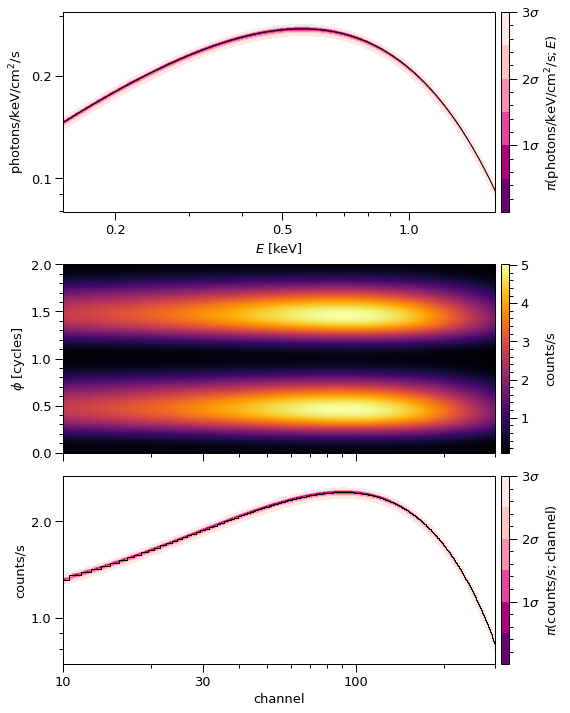

In [25]:
pp.plots['ST'].fig